In [1]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import pandas as pd

In [13]:
df = pd.read_csv('./Reviews And Ratings.csv')

In [14]:
df.head(10)

,Unnamed: 0,Rating,Lang,Type,Country,Date,Helpful,translated
0,72,5,it,Verified,Italy,11/1/2020,43.0,What to say? My daughter LOVES him and I with ...
1,85,5,it,Not Verified,Italy,9/10/2019,36.0,"I decided to test this plush to my grandson, j..."
2,107,5,it,Verified,Italy,8/12/2019,2.0,"An unusual pet, this otter is beautiful! Cute ..."
3,109,4,it,Verified,Italy,4/2/2021,1.0,"Beautiful, soft and very relaxing. It comes wi..."
4,113,4,it,Verified,Italy,21/02/2020,2.0,"Plush tender, my 16-month-old loves it, sleeps..."
5,115,5,it,Verified,Italy,12/11/2019,3.0,"I love it, simply. I bought it after seeing it..."
6,116,5,it,Verified,Italy,25/10/2019,5.0,"Beautiful product, the only problem and that t..."
7,125,5,it,Verified,Italy,7/8/2020,2.0,Perfect!! Relaxed very much my son of 4 months...
8,138,5,it,Verified,Italy,25/04/2020,NaN,The otter accompanies the dwarfs of my baby wi...
9,146,2,it,Verified,Italy,23/11/2020,NaN,"Functional carillon, my 4 month old girl falls..."


In [15]:
fig = px.histogram(df, x="Rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Stars Rating Score')
fig.show()

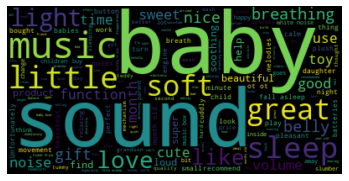

In [18]:
import nltk
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
# Create stopword list:
STOP_WORDS.add('otter')
stopwords = set(list(STOP_WORDS) +list(stopwords.words()))
stopwords.update(["br", "href", 'https'])
stopwords.update(stopwords)
textt = " ".join(desc for desc in df.translated)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [19]:
df = df[df['Rating'] != 0]
#Creating Positive & Negative sentiments as +1 and -1 according to rating
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating >= 4 else -1)

In [20]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

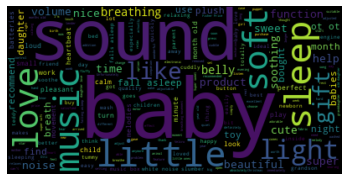

In [22]:
#WordCloud for positive samples
stopwords.update(["br", "href","good","great", 'https']) 
pos = " ".join(review for review in positive.translated)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
for i in positive[positive['translated'].str.contains("otter")]['translated'].iloc[0:7]:
    print(i,'\n')

What to say? My daughter LOVES him and I with her. Very soft, zero visible seams, tender and especially functional. It reproduces according to the choice of music, white noise, the sound of the Breath or heartbeat. Also the otter tummy lights up and moves as if breathing. For the newborn is a real comfort in the cradle, always kept in safety, I place it away from his face so that he can perceive it even just by touching it with his hand. Wonderful purchase, we are really happy! 

I decided to test this plush to my grandson, just three years old. As soon as he saw it he was very happy and he exclaimed it was: "Zia, it's very soft!" Actually the plush is really soft to the touch and a real companion for the nights, of our children. The animal represented is a gray otter, a toy animal that is able to help children play and also relax, during the night and during the time they rest. This otter is able to emit vibrations that calm and relax the child, but also of music, very sweet. It is su

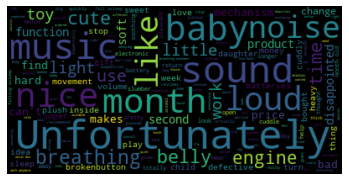

In [24]:
#WordCloud for negative samples
neg = " ".join(review for review in negative.translated)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [25]:
#searching negative words that contains the product name i.e. otter
for i in negative[negative['translated'].str.contains("otter")]['translated'].iloc[0:7]:
    print(i,'\n')

The mechanism is a little noisy when “breathing” and if the tummy touches baby when the otter takes a breath, the gentle pressure it creates turns the otter off. But I love the sounds and the light, their is a volume control which is great. Overall I like it, just wish it wasnt as sensitive. 

Super cute toy and very soft. I like that you can choose all the setting to personalize the otter like the sounds, volume, light and so on. The only thing I dont love is when you have the belly function on it make sort of a robotic noise and if baby is holding it tightly it makes a clicking noise as it tries to move. Overall great toy but a little bit pricey for a musical stuffed animal. 

The controller inside of otter is too chunky and hard. I was expecting very soft snuggly toy for nighttime. my 1 1/2 old throw it out from crib all the time. She doesn’t like it.... :(  other than that, it works fine. 

The button to activate this is on the otter's tummy and very sensitive.  So, if my upset bab

In [26]:
#Distribution of sentiments amongst samples.
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [27]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['translated'] = df['translated'].apply(remove_punctuation)
df = df.dropna(subset=['translated'])
df['translated'] = df['translated'].apply(remove_punctuation)

In [28]:
#Creating a dataset with sementiment along with review
dfNew = df[['translated','sentiment']]
dfNew.head()

,translated,sentiment
0,What to say My daughter LOVES him and I with h...,1
1,"I decided to test this plush to my grandson, j...",1
2,"An unusual pet, this otter is beautiful Cute m...",1
3,"Beautiful, soft and very relaxing It comes wit...",1
4,"Plush tender, my 16-month-old loves it, sleeps...",1


In [29]:
#Preparing Data to pass to model
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['translated'])
test_matrix = vectorizer.transform(test['translated'])

In [32]:
#Training Model on Data
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [34]:
lr.fit(X_train,y_train)

c:\users\khan\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [35]:
predictions = lr.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 22,   3],
       [ 32, 265]], dtype=int64)

In [37]:
#Printing results of training
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.41      0.88      0.56        25
           1       0.99      0.89      0.94       297

    accuracy                           0.89       322
   macro avg       0.70      0.89      0.75       322
weighted avg       0.94      0.89      0.91       322



In [38]:
count=0
for prediction, true_value in zip(predictions,y_test):
    if prediction == true_value:
        count+=1
print('accuracy is', round((count/len(predictions))*100,2), '%.')

accuracy is 89.13 %.


In [39]:
df = df[df['Rating'] != 0]
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating >= 4 else -1)

In [40]:
df_1 = df[df['Rating'] == 1]
df_2 = df[df['Rating'] == 2]
df_3 = df[df['Rating'] == 3]
df_4 = df[df['Rating'] == 4]
df_5 = df[df['Rating'] == 5]

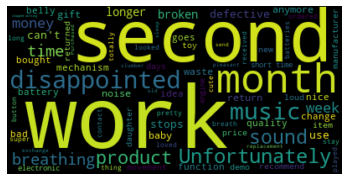

In [41]:
#wordcloud for rating 1
stopwords.update(["br", "href","good","great", 'https']) 
pos = " ".join(review for review in df_1.translated)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

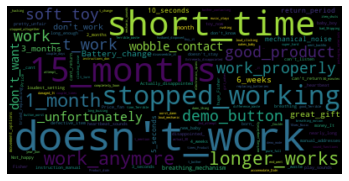

In [42]:
#wordcloud for biwords for rating 1
word_arr = pos.split(' ')
fin_arr = []
for counter in range(len(word_arr)):
    if counter+1 != len(word_arr)  and word_arr[counter].lower() not in STOP_WORDS and word_arr[counter+1].lower() not in STOP_WORDS:
        fin_arr.append((word_arr[counter] + '_' + word_arr[counter+1]))
pos = ' '.join(fin_arr)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

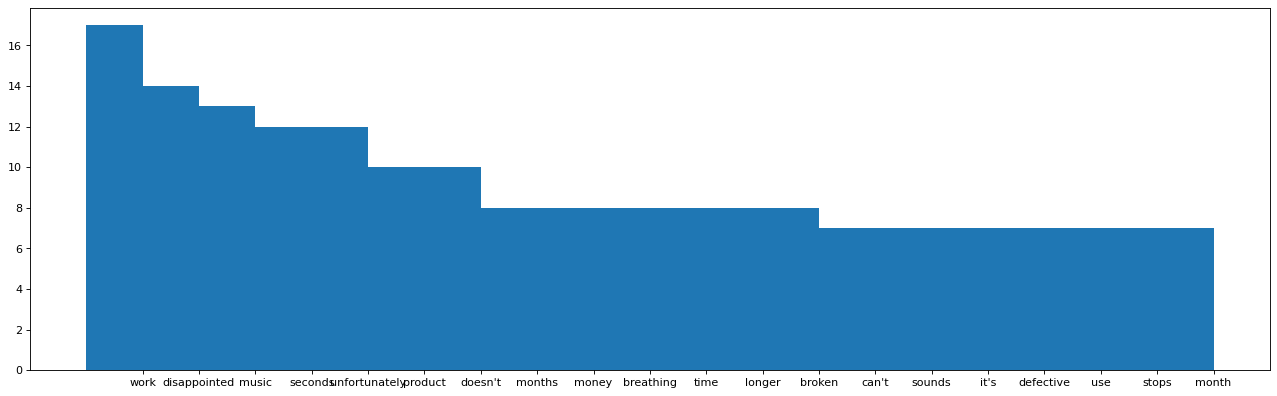

In [43]:
#freq_plot for rating 1
complete_text = []
for sent in df_1['translated']:
    for word in sent.split(' '):
        if word.strip(',').lower() not in STOP_WORDS:
            complete_text.append(word.strip(',').lower())

from collections import Counter
word_count = Counter(complete_text)

count_plot = word_count.most_common()[0:20]

from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

labels = []
values = []
for tupple in count_plot:
    labels.append(tupple[0])
    values.append(tupple[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

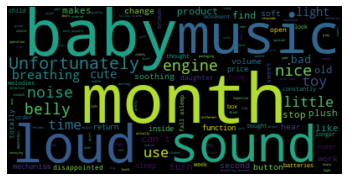

In [44]:
#wordcloud for rating 2
stopwords.update(["br", "href","good","great", 'https']) 
pos = " ".join(review for review in df_2.translated)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

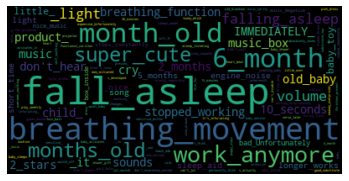

In [45]:
#wordcloud for biwords for rating 2
word_arr = pos.split(' ')
fin_arr = []
for counter in range(len(word_arr)):
    if counter+1 != len(word_arr)  and word_arr[counter].lower() not in STOP_WORDS and word_arr[counter+1].lower() not in STOP_WORDS:
        fin_arr.append((word_arr[counter] + '_' + word_arr[counter+1]))
pos = ' '.join(fin_arr)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

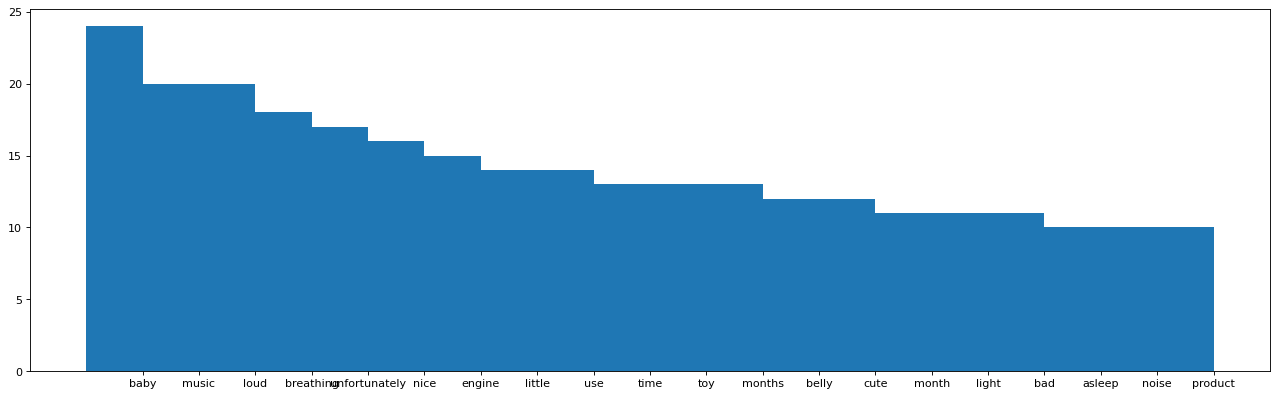

In [46]:
#freq_plot for rating 2
complete_text = []
for sent in df_2['translated']:
    for word in sent.split(' '):
        if word.strip(',').lower() not in STOP_WORDS:
            complete_text.append(word.strip(',').lower())

from collections import Counter
word_count = Counter(complete_text)

count_plot = word_count.most_common()[0:20]

from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

labels = []
values = []
for tupple in count_plot:
    labels.append(tupple[0])
    values.append(tupple[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

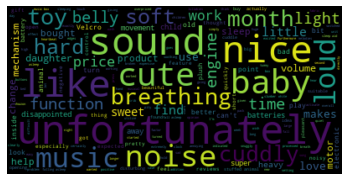

In [47]:
#wordcloud for rating 3
stopwords.update(["br", "href","good","great", 'https']) 
pos = " ".join(review for review in df_3.translated)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

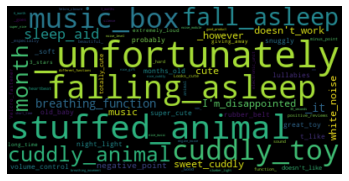

In [48]:
#wordcloud for biwords for rating 3
word_arr = pos.split(' ')
fin_arr = []
for counter in range(len(word_arr)):
    if counter+1 != len(word_arr)  and word_arr[counter].lower() not in STOP_WORDS and word_arr[counter+1].lower() not in STOP_WORDS:
        fin_arr.append((word_arr[counter] + '_' + word_arr[counter+1]))
pos = ' '.join(fin_arr)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

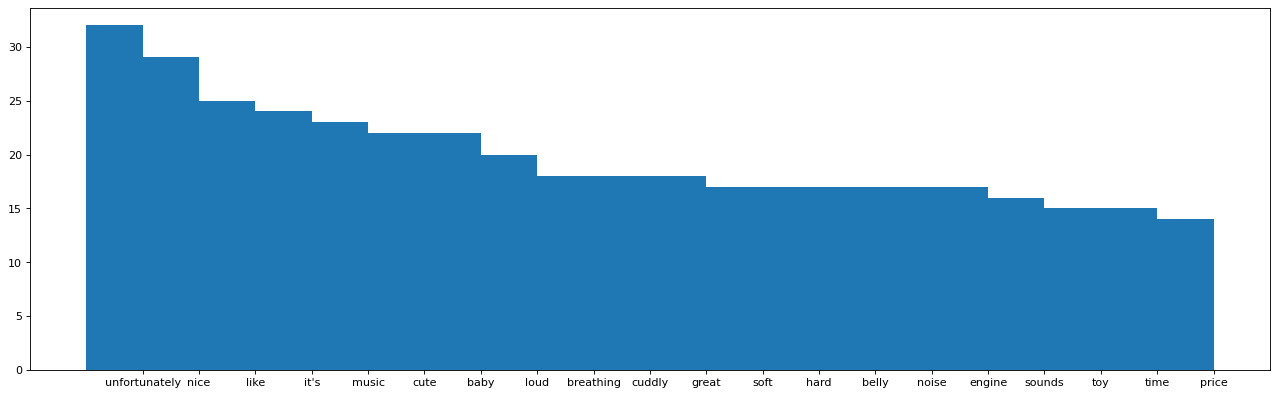

In [49]:
#freq_plot for rating 3
complete_text = []
for sent in df_3['translated']:
    for word in sent.split(' '):
        if word.strip(',').lower() not in STOP_WORDS:
            complete_text.append(word.strip(',').lower())

from collections import Counter
word_count = Counter(complete_text)

count_plot = word_count.most_common()[0:20]

from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

labels = []
values = []
for tupple in count_plot:
    labels.append(tupple[0])
    values.append(tupple[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

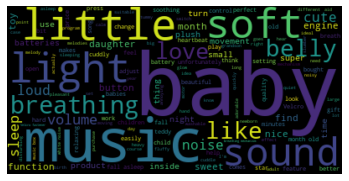

In [50]:
#wordcloud for rating 4
stopwords.update(["br", "href","good","great", 'https']) 
pos = " ".join(review for review in df_4.translated)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

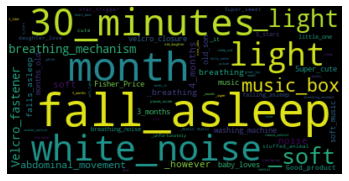

In [51]:
#wordcloud for biwords for rating 4
word_arr = pos.split(' ')
fin_arr = []
for counter in range(len(word_arr)):
    if counter+1 != len(word_arr)  and word_arr[counter].lower() not in STOP_WORDS and word_arr[counter+1].lower() not in STOP_WORDS:
        fin_arr.append((word_arr[counter] + '_' + word_arr[counter+1]))
pos = ' '.join(fin_arr)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

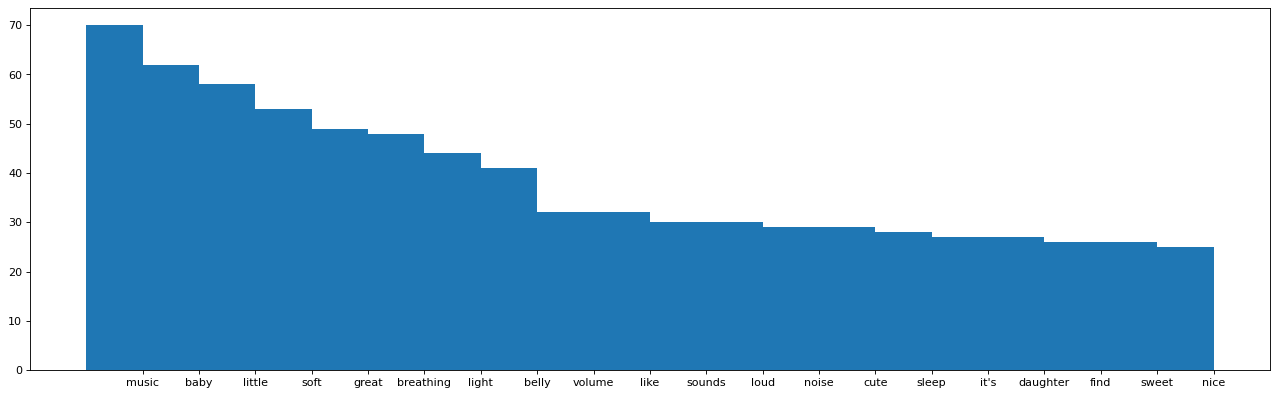

In [52]:
#freq_plot for rating 4
complete_text = []
for sent in df_4['translated']:
    for word in sent.split(' '):
        if word.strip(',').lower() not in STOP_WORDS:
            complete_text.append(word.strip(',').lower())

from collections import Counter
word_count = Counter(complete_text)

count_plot = word_count.most_common()[0:20]

from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

labels = []
values = []
for tupple in count_plot:
    labels.append(tupple[0])
    values.append(tupple[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

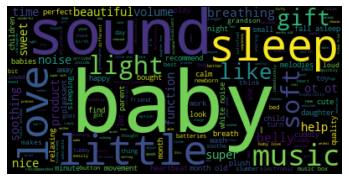

In [53]:
#wordcloud for rating 5
stopwords.update(["br", "href","good","great", 'https']) 
pos = " ".join(review for review in df_5.translated)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

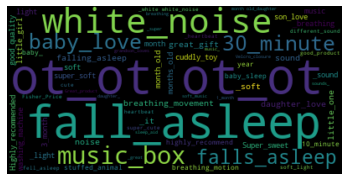

In [54]:
#wordcloud for biwords for rating 5
word_arr = pos.split(' ')
fin_arr = []
for counter in range(len(word_arr)):
    if counter+1 != len(word_arr)  and word_arr[counter].lower() not in STOP_WORDS and word_arr[counter+1].lower() not in STOP_WORDS:
        fin_arr.append((word_arr[counter] + '_' + word_arr[counter+1]))
pos = ' '.join(fin_arr)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

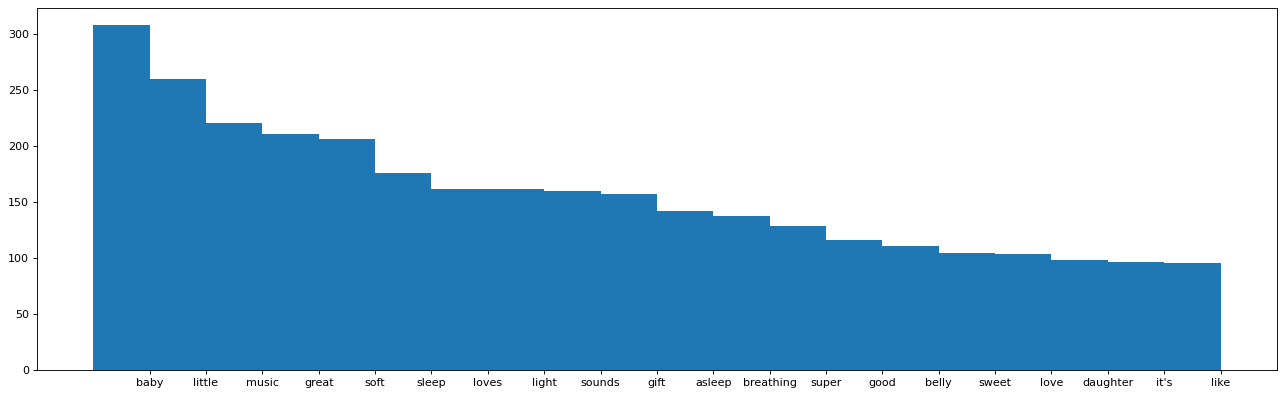

In [55]:
#freq_plot for rating 5
complete_text = []
for sent in df_5['translated']:
    for word in sent.split(' '):
        if word.strip(',').lower() not in STOP_WORDS:
            complete_text.append(word.strip(',').lower())

from collections import Counter
word_count = Counter(complete_text)

count_plot = word_count.most_common()[0:20]

from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

labels = []
values = []
for tupple in count_plot:
    labels.append(tupple[0])
    values.append(tupple[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [70]:
import pandas as pd
import spacy

In [71]:
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
#         elif token.orth_.startswith('@'):
#             lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [72]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [token for token in tokens if token != 'https']
    tokens = [get_lemma(token) for token in tokens]
    tokens = [get_lemma(token) if token not in ('corona', 'covid', 'covid19', 'covid-19', 'coronavirus', 'virus') else 'covid' for token in tokens]
    return tokens

In [73]:
import random
text_data = []
def tokens_(line):
    tokens = prepare_text_for_lda(line)
    text_data.append(tokens)
    if random.random() > .99:
        print(tokens)

In [74]:
_ = df['translated'].apply(tokens_)

['lovely', 'product', 'great', 'addition', 'baby', 'nighttime', 'routine']
['perfect']
['recommend', 'family', 'member', 'purchase', 'prior', 'purchasing', 'concern', 'review', 'little', 'skeptical', 'pretty', 'pricey', 'want', 'chance', 'extremely', 'function', 'allow', 'choose', 'music', 'light', 'brighten', 'breathing', 'function', 'combo', 'would', 'asleep', 'watching', 'month', 'later', 'sadly', 'return', 'belly', 'second', 'music', 'light', 'leave', 'pressing', 'belly', 'click', 'sound', 'initially', 'turning', 'ongoing', 'issue', 'unsure', 'order', 'another']
['little', 'love']
['super', 'cuddly', 'otter', 'song', 'relax', 'animate', 'along', 'unfortunately', 'engine', 'extremely', 'lowest', 'volume', 'hardly', 'music', 'crack', 'constantly', 'really', 'manufacturer', 'quiet', 'engine']
['otter', 'basically', 'sweet', 'fluffy', 'unfortunately', 'motor', 'abdominal', 'movement', 'extremely', 'disturb']
['super']
['sweet', 'really', 'noise', 'engine', 'trigger']
['recommend', 'chi

In [75]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

c:\users\khan\appdata\local\programs\python\python39\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [77]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.050*"otter" + 0.029*"little" + 0.025*"sleep" + 0.017*"light" + 0.016*"month" + 0.014*"noise" + 0.013*"music" + 0.012*"sound" + 0.011*"great" + 0.010*"asleep"')
(1, '0.031*"sound" + 0.023*"music" + 0.023*"otter" + 0.021*"breathing" + 0.017*"little" + 0.016*"light" + 0.015*"noise" + 0.014*"belly" + 0.011*"great" + 0.010*"movement"')
(2, '0.019*"otter" + 0.013*"asleep" + 0.013*"sound" + 0.013*"light" + 0.012*"child" + 0.011*"really" + 0.011*"buy" + 0.011*"music" + 0.011*"plush" + 0.011*"month"')
(3, '0.045*"otter" + 0.019*"music" + 0.017*"super" + 0.015*"really" + 0.014*"sweet" + 0.014*"great" + 0.012*"would" + 0.012*"cuddly" + 0.011*"beautiful" + 0.011*"breathing"')
(4, '0.044*"love" + 0.033*"sleep" + 0.024*"great" + 0.024*"product" + 0.024*"recommend" + 0.018*"little" + 0.014*"grandson" + 0.014*"help" + 0.013*"month" + 0.013*"perfect"')
